In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from pyclesperanto_prototype import Image, plugin_function

cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
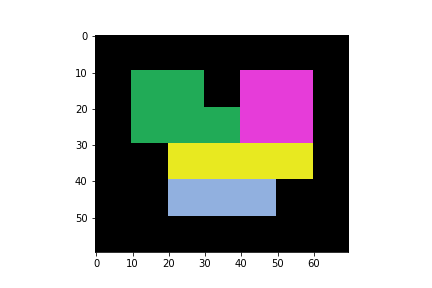

In [2]:
labels = cle.asarray([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 2, 2, 0],
    [0, 1, 1, 1, 2, 2, 0],
    [0, 0, 3, 3, 3, 3, 0],
    [0, 0, 4, 4, 4, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
])
labels = cle.scale(labels, factor_x=10, factor_y=10, auto_size=True).astype(np.uint32)
labels

In [3]:
touch_count_matrix = cle.generate_touch_count_matrix(labels)
print(touch_count_matrix)

[[ 0 70 50 30 50]
 [70  0 10 20  0]
 [50 10  0 20  0]
 [30 20 20  0 30]
 [50  0  0 30  0]]


In [4]:
touch_portion_matrix = cle.generate_touch_portion_matrix(labels)
print(touch_portion_matrix)

[[0.         0.7        0.625      0.29999998 0.625     ]
 [0.35       0.         0.125      0.19999999 0.        ]
 [0.25       0.09999999 0.         0.19999999 0.        ]
 [0.14999999 0.19999999 0.25       0.         0.375     ]
 [0.25       0.         0.         0.29999998 0.        ]]


In [5]:
cle.is_matrix_symmetric(touch_count_matrix)

True

In [6]:
cle.is_matrix_symmetric(touch_portion_matrix)

False

In [7]:
cle.generate_n_most_touching_neighbors_matrix(touch_count_matrix, n=1)

cl.OCLArray([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [8]:
cle.generate_n_most_touching_neighbors_matrix(touch_portion_matrix, n=1)

cl.OCLArray([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [9]:
cle.generate_n_most_touching_neighbors_matrix(touch_portion_matrix, n=2)

cl.OCLArray([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

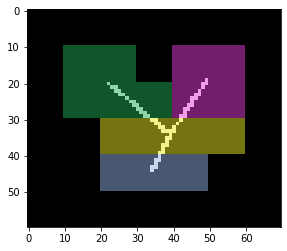

In [10]:
mesh = cle.draw_mesh_between_n_most_touching_labels(labels, n=1)

cle.imshow(labels, labels=True, continue_drawing=True)
cle.imshow(mesh, alpha=0.5)

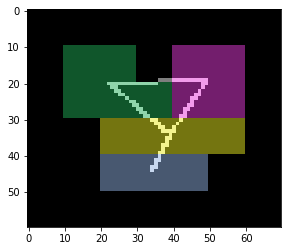

In [11]:
mesh = cle.draw_mesh_between_n_most_touching_labels(labels, n=2)

cle.imshow(labels, labels=True, continue_drawing=True)
cle.imshow(mesh, alpha=0.5)

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
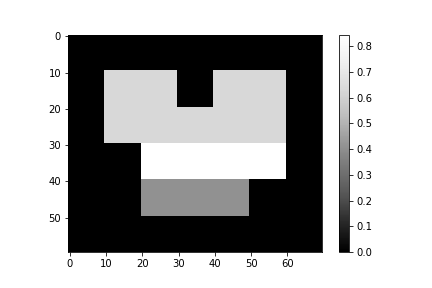
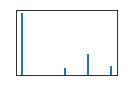

In [12]:
sd_map = cle.standard_deviation_of_n_most_touching_neighbors_map(labels, labels, n=2)

sd_map

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
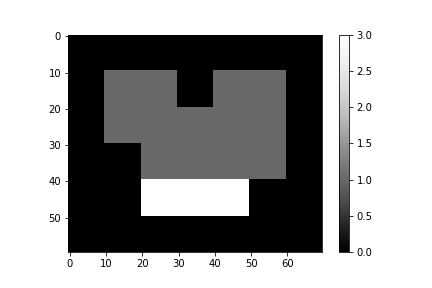
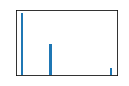

In [13]:
min_map = cle.minimum_of_n_most_touching_neighbors_map(labels, labels, n=2)

min_map

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
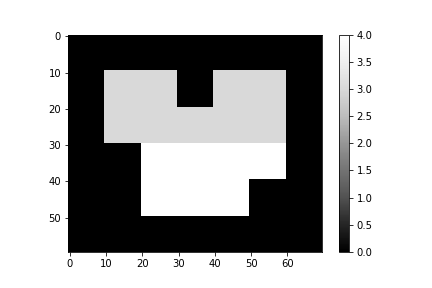
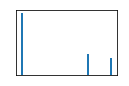

In [14]:
max_map = cle.maximum_of_n_most_touching_neighbors_map(labels, labels, n=1)

max_map

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
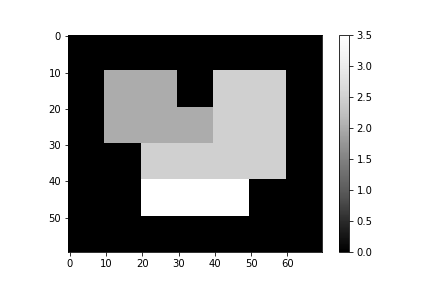
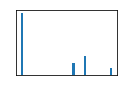

In [15]:
mean_map = cle.mean_of_n_most_touching_neighbors_map(labels, labels, n=1)

mean_map

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
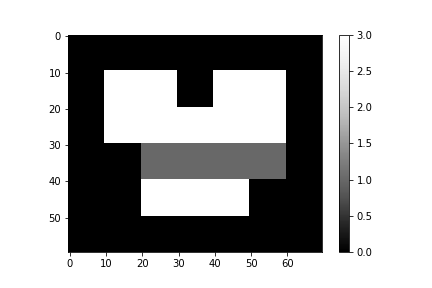
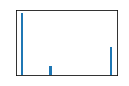

In [16]:
mode_map = cle.mode_of_n_most_touching_neighbors_map(labels, labels, n=1)
mode_map

In [17]:
cle.generate_n_most_touching_neighbors_matrix(touch_count_matrix, n=2)

cl.OCLArray([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
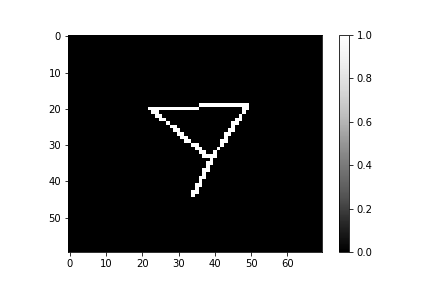
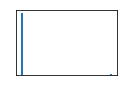

In [18]:
cle.draw_mesh_between_n_most_touching_labels(labels, n=2)

In [19]:
cle.generate_n_most_touching_neighbors_matrix(touch_count_matrix, n=2)

cl.OCLArray([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
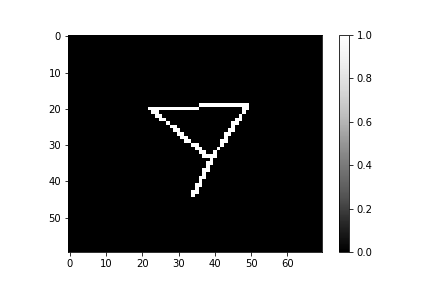
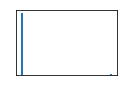

In [20]:
cle.draw_mesh_between_n_most_touching_labels(labels, n=3)